In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [7]:
df = pd.read_csv("Clustered_df.csv")
df = df.drop(columns = ["Unnamed: 0", "Clusters"])
df

,car_name,year,milage,engine_size,fuel_type,age,age_scaled,milage_scaled,engine_size_scaled,fuel_type_scaled,Score,Tier
0,Mercedes-Benz C-Class 3.0 C43 V6 AMG (Premium ...,2020,55999,3.0,Petrol,5,0.946667,0.641135,0.6250,0.5,32.13,Moderate
1,Audi RS Q3 RS Q3 TFSI Quattro 5dr S Tronic [Co...,2020,18747,2.5,Petrol,5,0.946667,0.879968,0.6875,0.5,35.15,Moderate
2,Mazda MX-5 1.5 SKYACTIV-G Sport Nav+ Euro 6 2dr,2019,21847,1.5,Petrol,6,0.933333,0.860093,0.8125,0.5,36.06,Moderate
3,1960 TVR Grantura Lightweight,1960,1234,1.2,Petrol,65,0.146667,0.992249,0.8500,0.5,29.89,High impact
4,PORSCHE 911 (992) GT3 TOURING,2022,3631,4.0,Petrol,3,0.973333,0.976881,0.5000,0.5,34.51,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...
964,Audi Q4 E-Tron,2024,6512,0.0,Electric,1,1.000000,0.958410,1.0000,1.0,49.59,Eco-Friendly
965,Christmas cracker - ready to go,1999,62901,4.0,Petrol,26,0.666667,0.596884,0.5000,0.5,27.64,High impact
966,Audi TT Coupe 2.0 TDI Quattro Black Edition 2d...,2013,119000,2.0,Diesel,12,0.853333,0.237218,0.7500,0.3,24.41,High impact
967,2017 67 MASERATI LEVANTE 3.0 V6 S SUV 5DR PETR...,2017,79997,3.0,Petrol,8,0.906667,0.487277,0.6250,0.5,30.19,High impact


In [20]:
df.describe()

,year,milage,engine_size,age,age_scaled,milage_scaled,engine_size_scaled,fuel_type_scaled,Score
count,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000
mean,2015.027864,36241.341589,2.810423,9.972136,0.880372,0.767807,0.648697,0.558101,34.135800
std,10.095528,29765.757285,1.697800,10.095528,0.134607,0.190837,0.212225,0.180160,6.343138
min,1949.000000,25.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,17.100000
25%,2013.000000,12139.000000,2.000000,4.000000,0.853333,0.652496,0.500000,0.500000,30.230000
50%,2018.000000,29500.000000,2.900000,7.000000,0.920000,0.811027,0.637500,0.500000,33.280000
75%,2021.000000,54227.000000,4.000000,12.000000,0.960000,0.922334,0.750000,0.500000,35.700000
max,2024.000000,156000.000000,8.000000,76.000000,1.000000,1.000000,1.000000,1.000000,49.990000


In [59]:
value_count = df["fuel_type"].value_counts()
percentage_distribution = (value_count / len(df)) * 100

In [61]:
percentage_distribution

fuel_type
Petrol      80.495356
Electric    12.177503
Diesel       4.127967
Hybrid       2.683179
Other        0.515996
Name: count, dtype: float64

In [63]:
fuel_type_dist = pd.DataFrame(percentage_distribution)

In [65]:
fuel_type_dist = fuel_type_dist.reset_index()

In [67]:
fuel_type_dist["count"] = fuel_type_dist["count"].round()

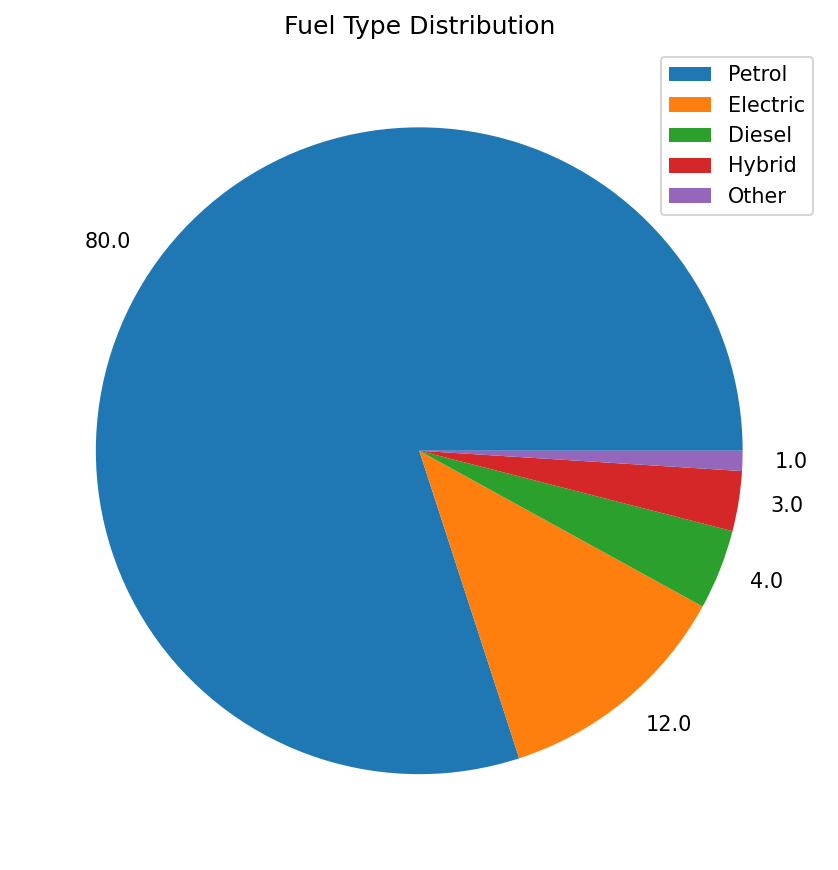

In [69]:
plt.figure(figsize = (12, 7), dpi = 150)
plt.pie(fuel_type_dist["count"], labels = fuel_type_dist["count"])
plt.legend(fuel_type_dist.fuel_type)
plt.title("Fuel Type Distribution")
plt.show()

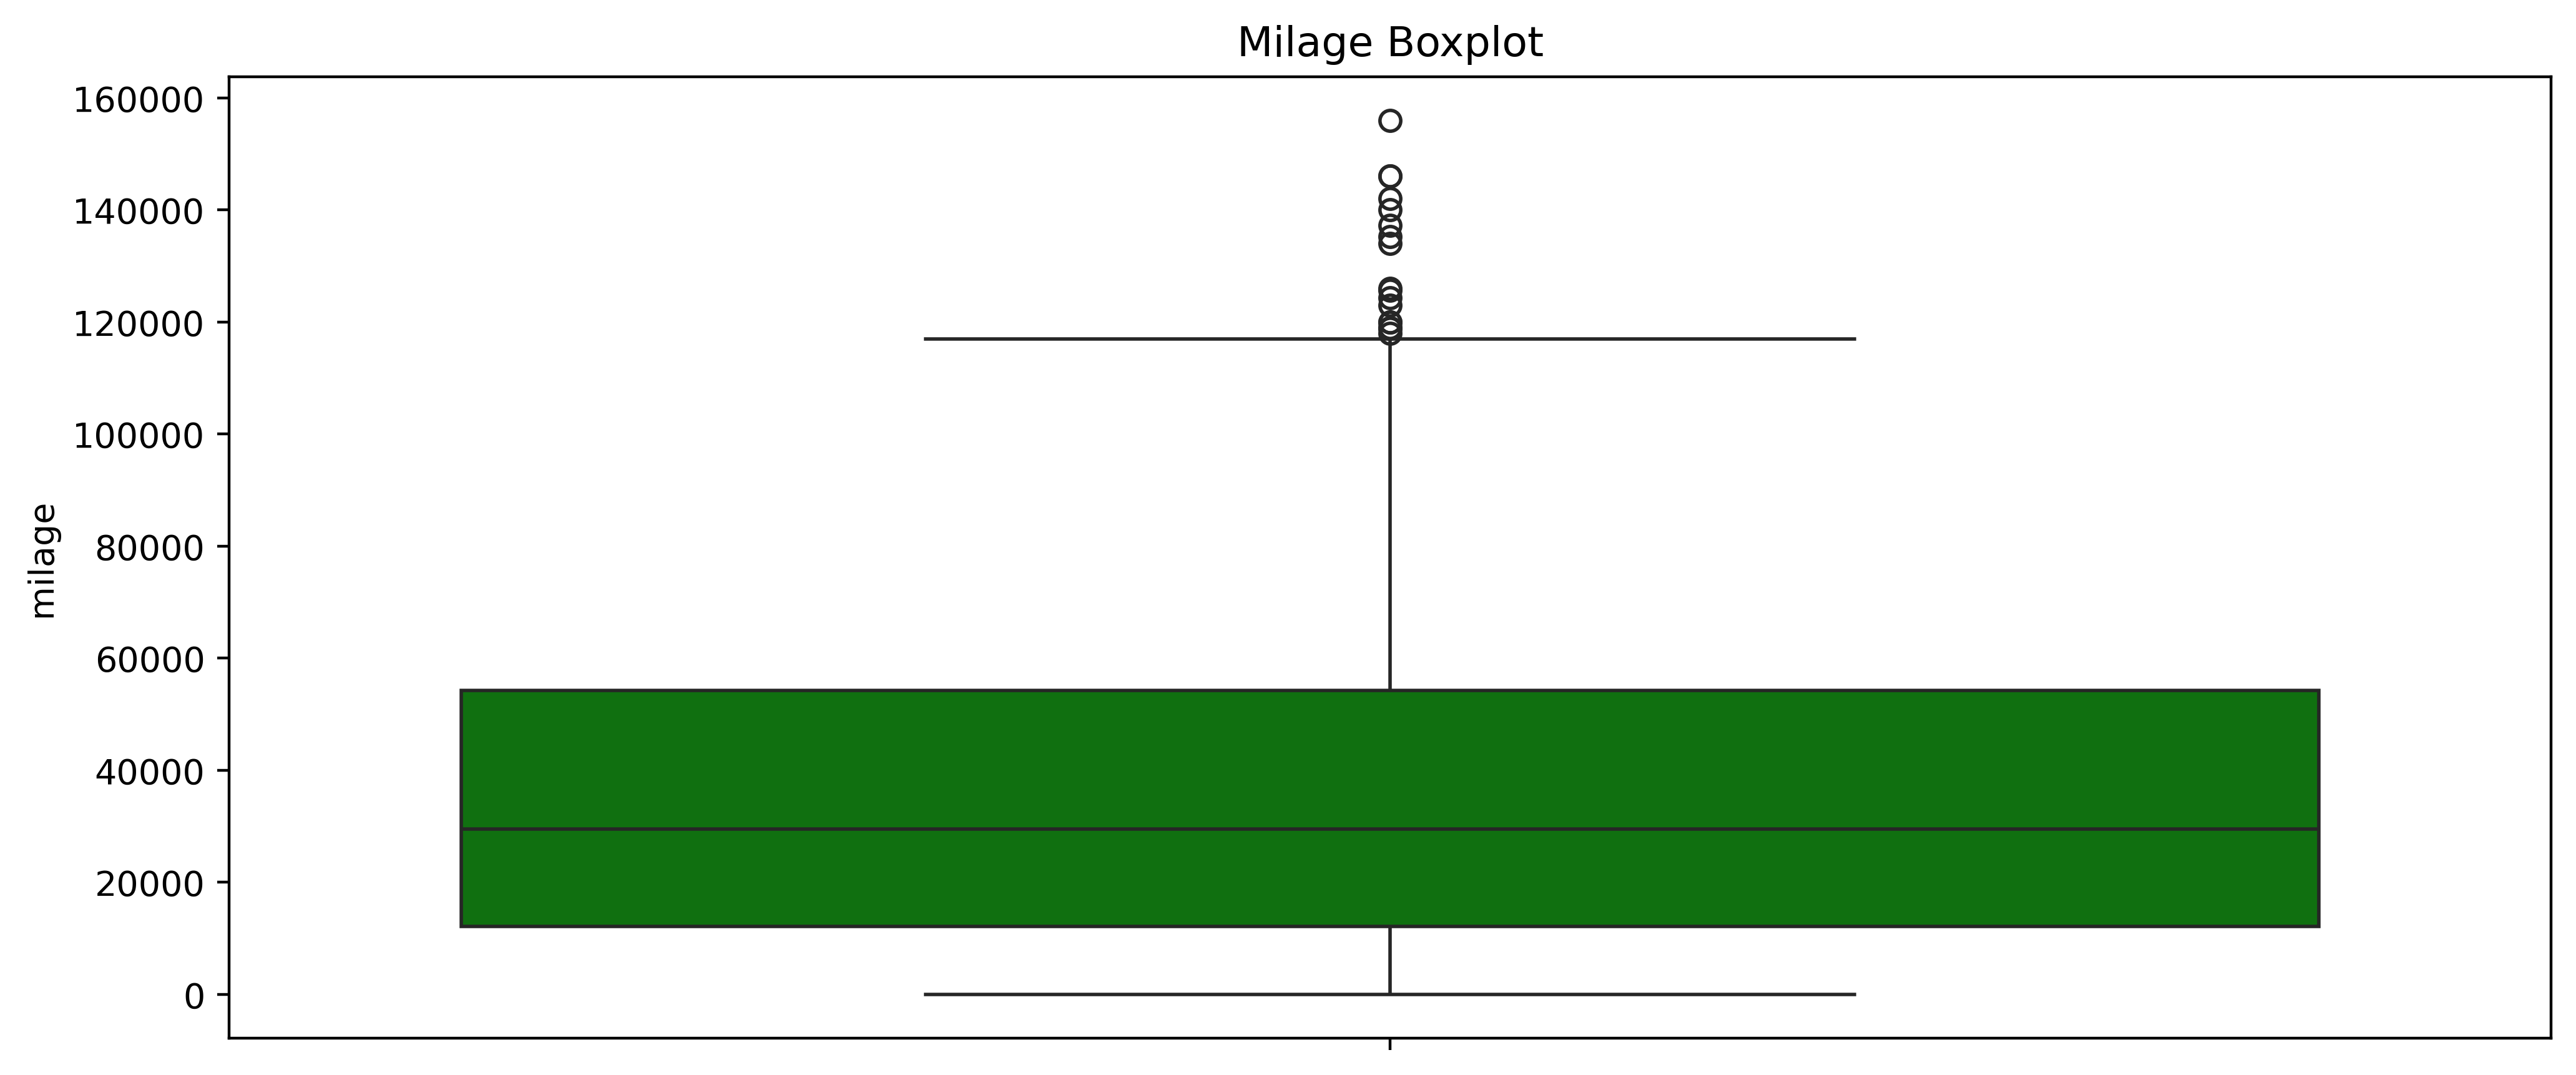

In [159]:
plt.figure(figsize = (12, 5), dpi = 400)
sns.boxplot(df.milage, color = "g")
plt.title("Milage Boxplot")
plt.show()

In [127]:
df_nums = df.drop(columns = ["car_name", "year", "fuel_type", "age_scaled", "milage_scaled", "engine_size_scaled", "Tier"])

In [129]:
df_corr = df_nums.corr()

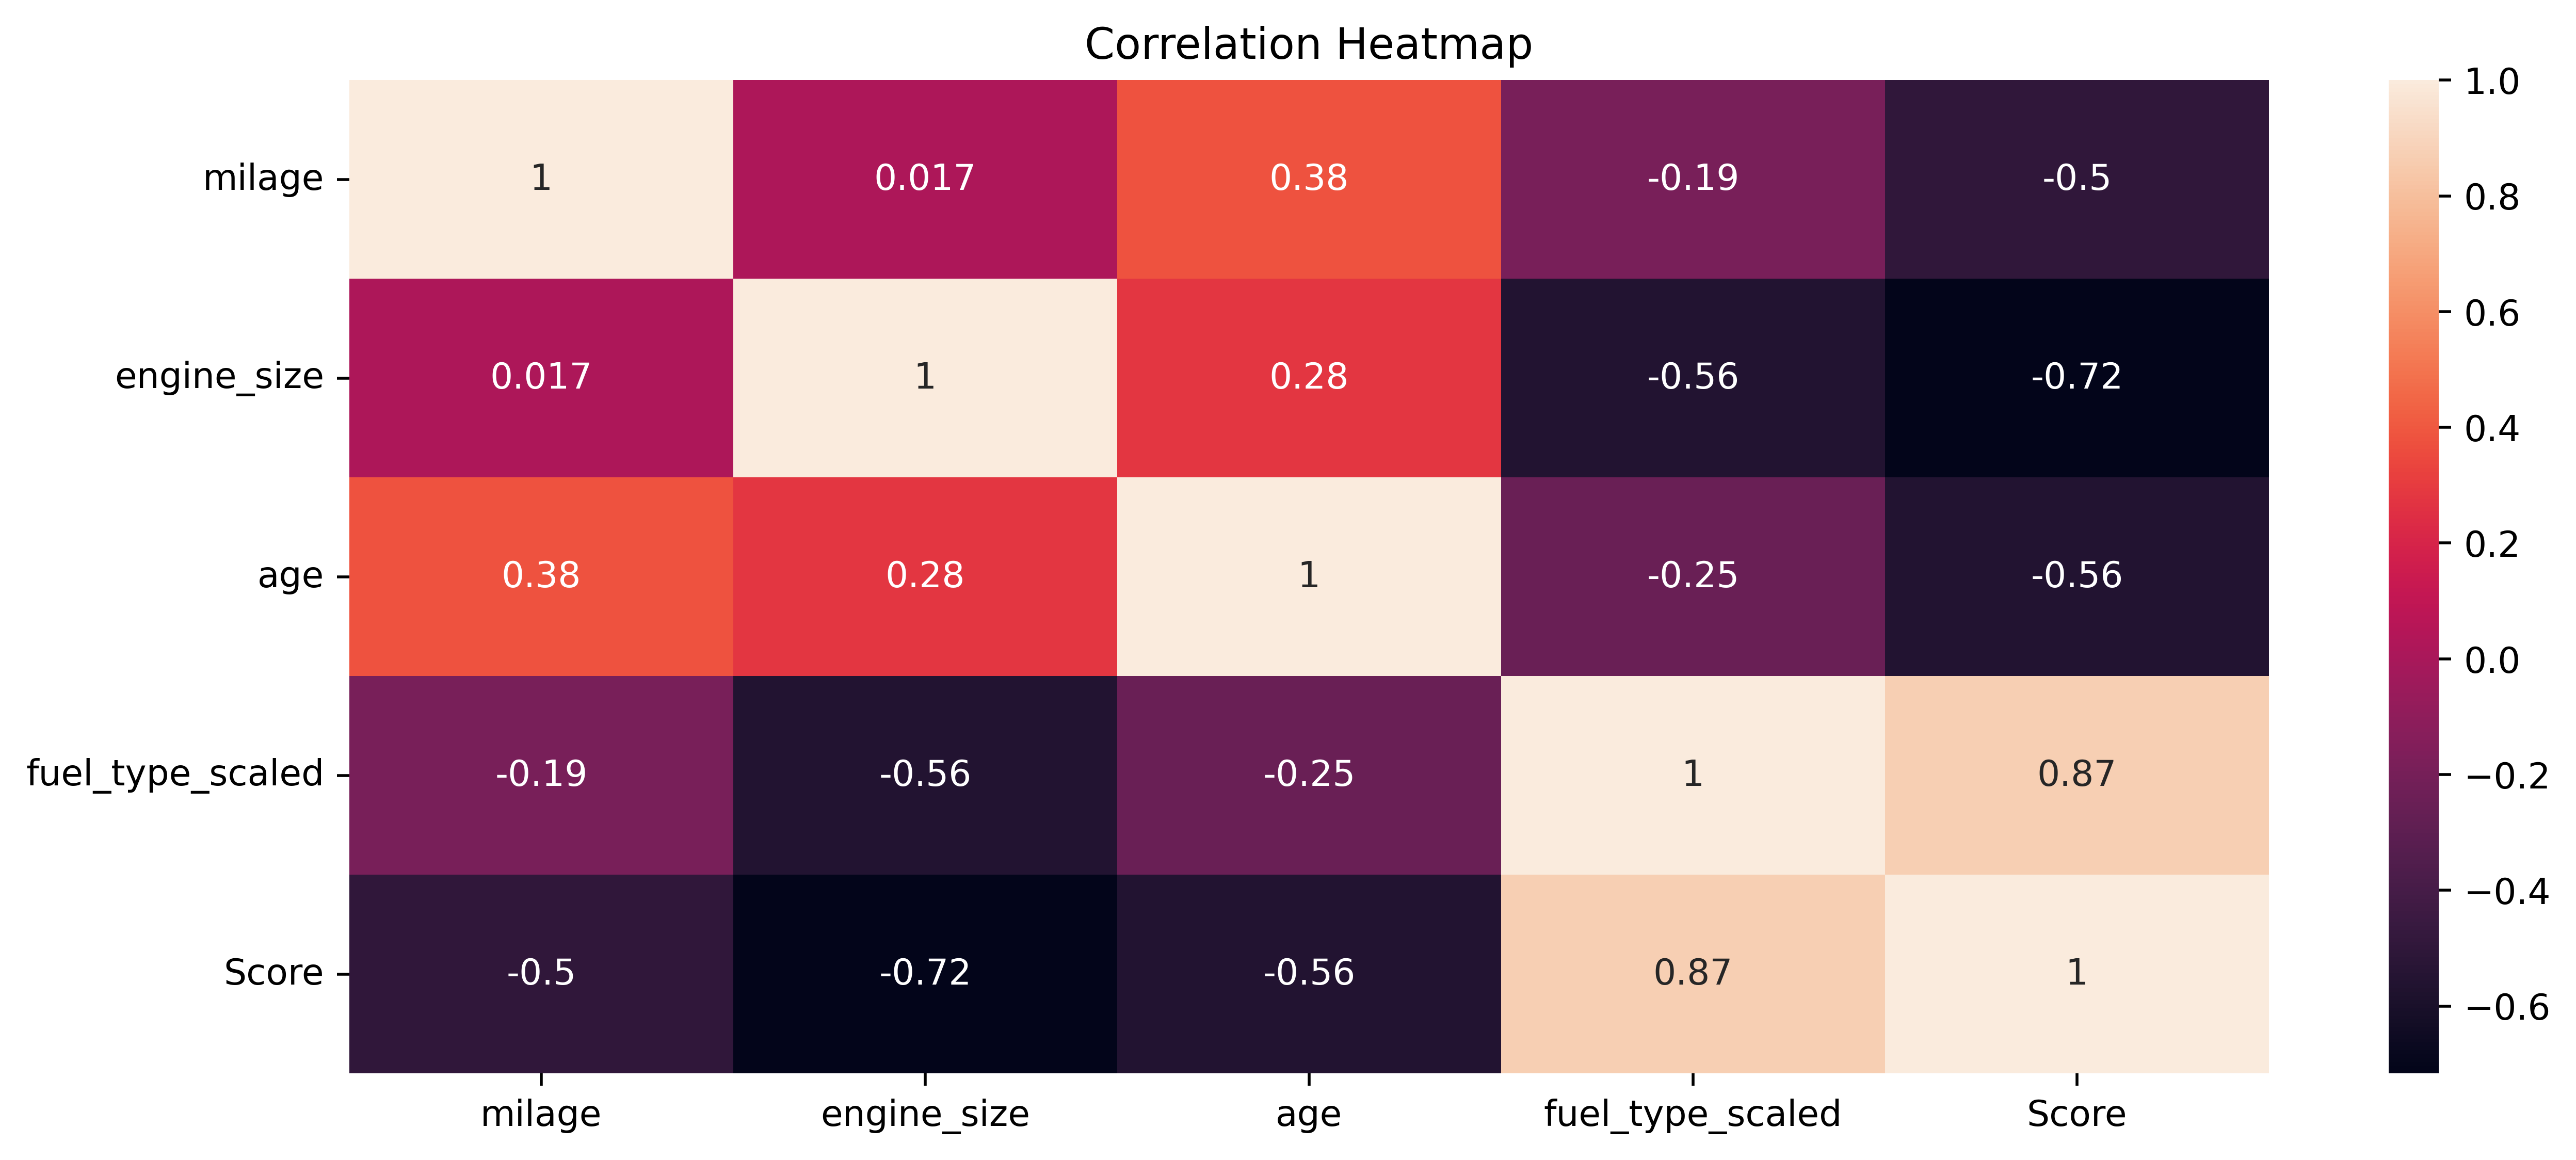

In [137]:
plt.figure(figsize = (12, 5), dpi = 500)
sns.heatmap(df_corr, annot = True)
plt.title("Correlation Heatmap")
plt.show()

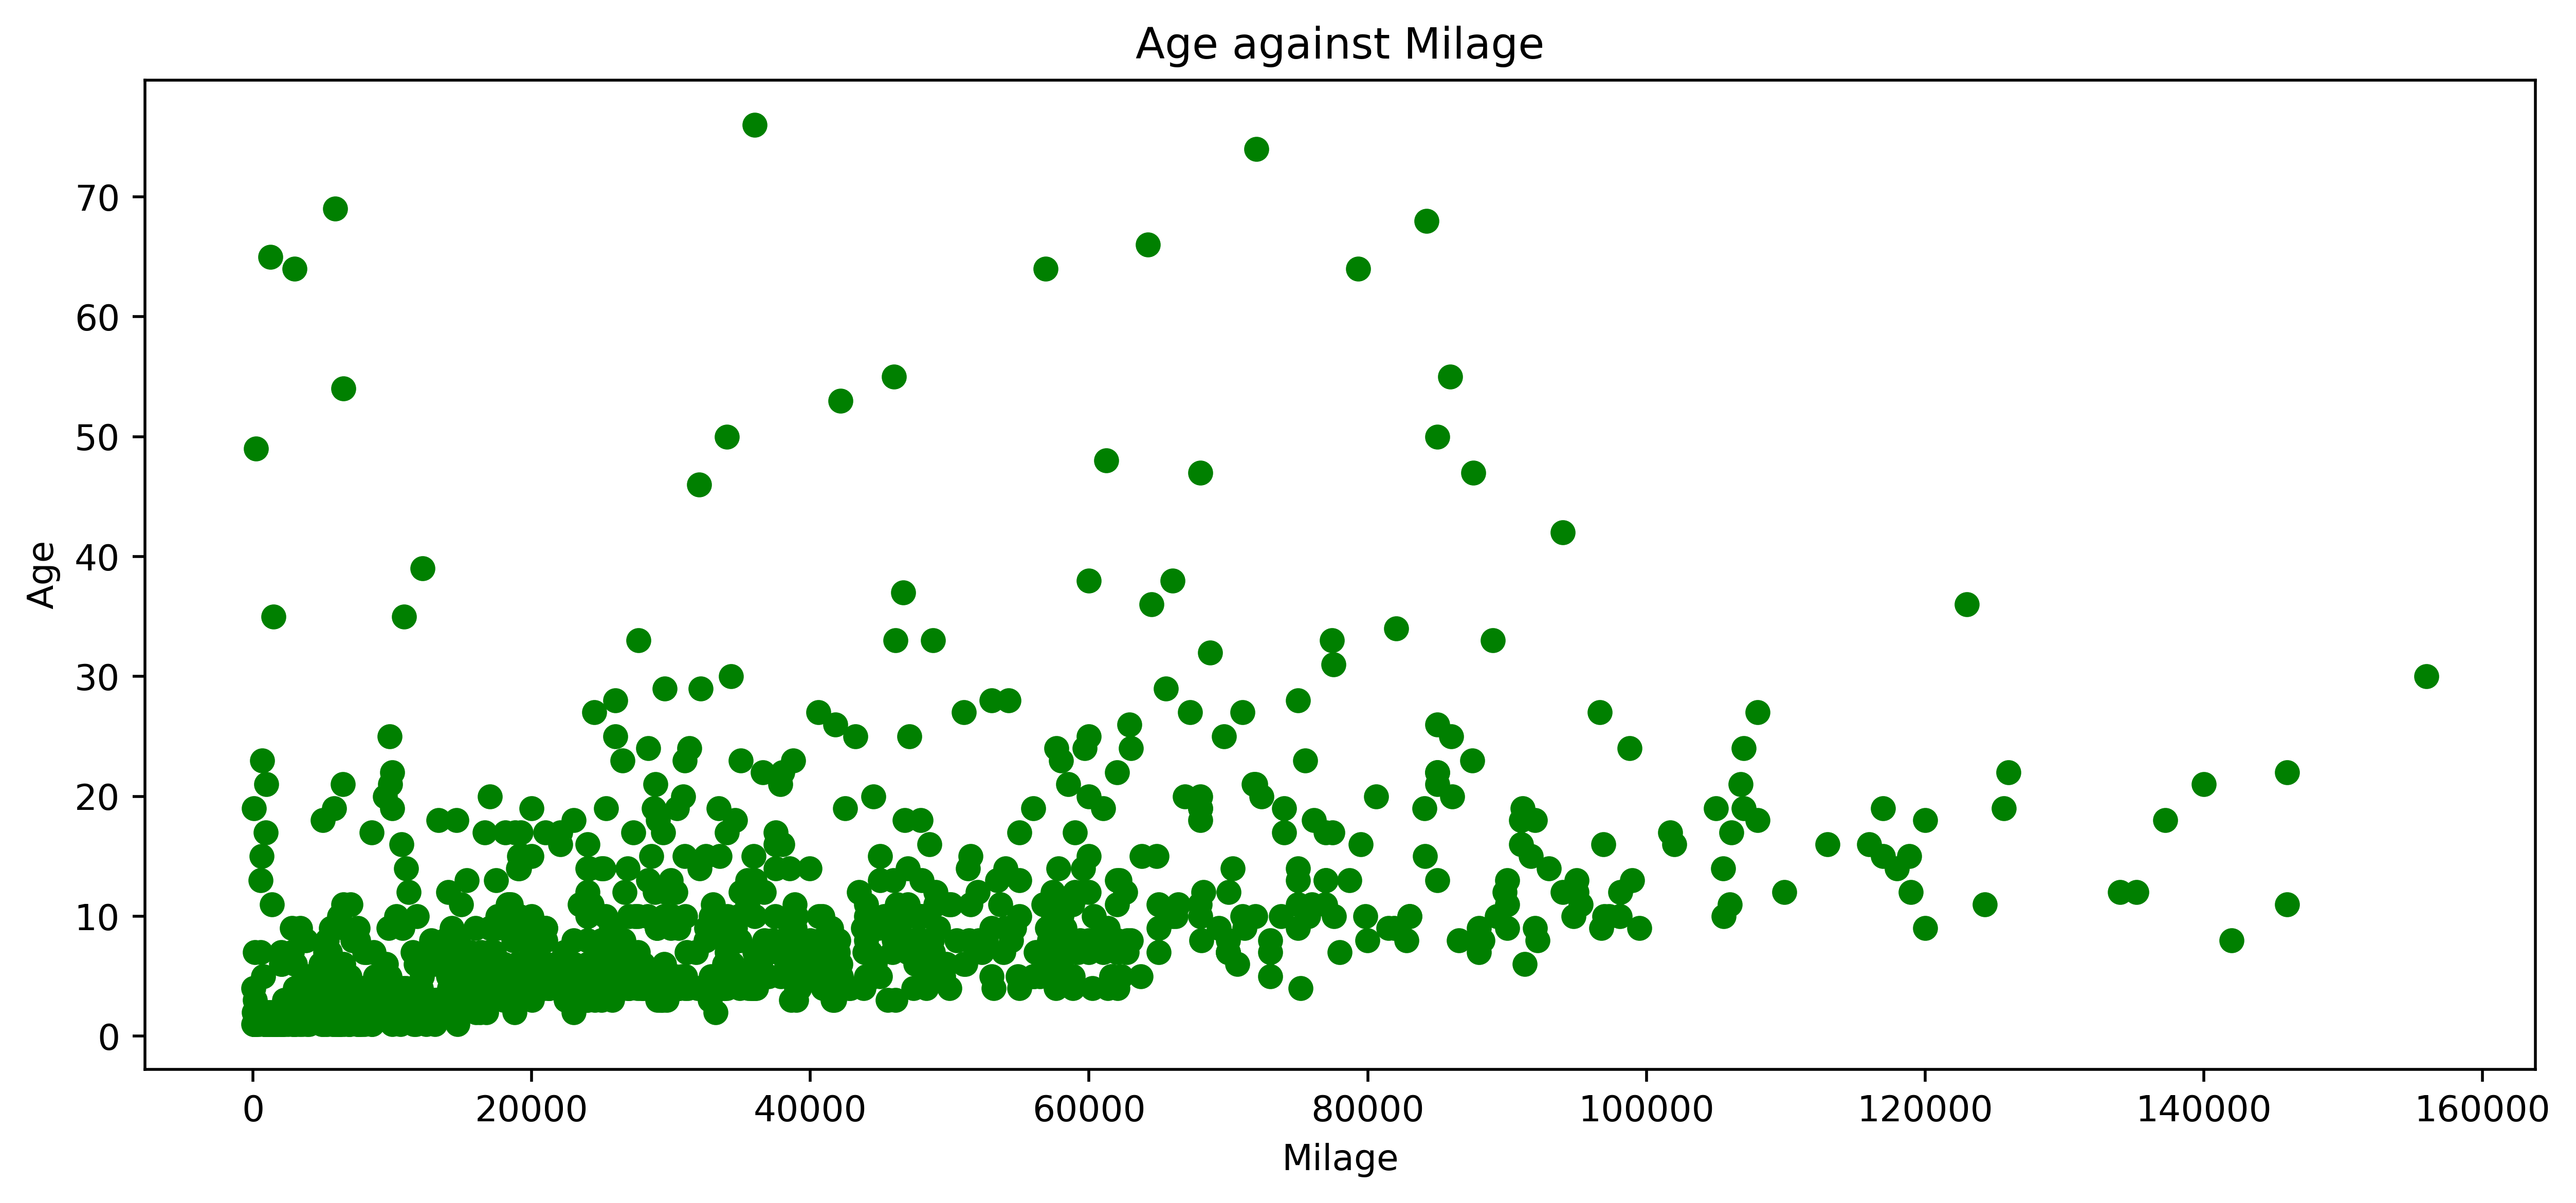

In [207]:
plt.figure(figsize = (12, 5), dpi = 500)
plt.scatter(df.milage, df.age, color = "g")
plt.xlabel("Milage")
plt.ylabel("Age")
plt.title("Age against Milage")
plt.show()

In [173]:
df_1 = df[df["age"] < 20]
df_2 = df_1[df_1["milage"] < 100000]

In [189]:
x = df_2[["milage"]]
y = df_2.age
LR = LinearRegression()
LR.fit(x, y)

LinearRegression()

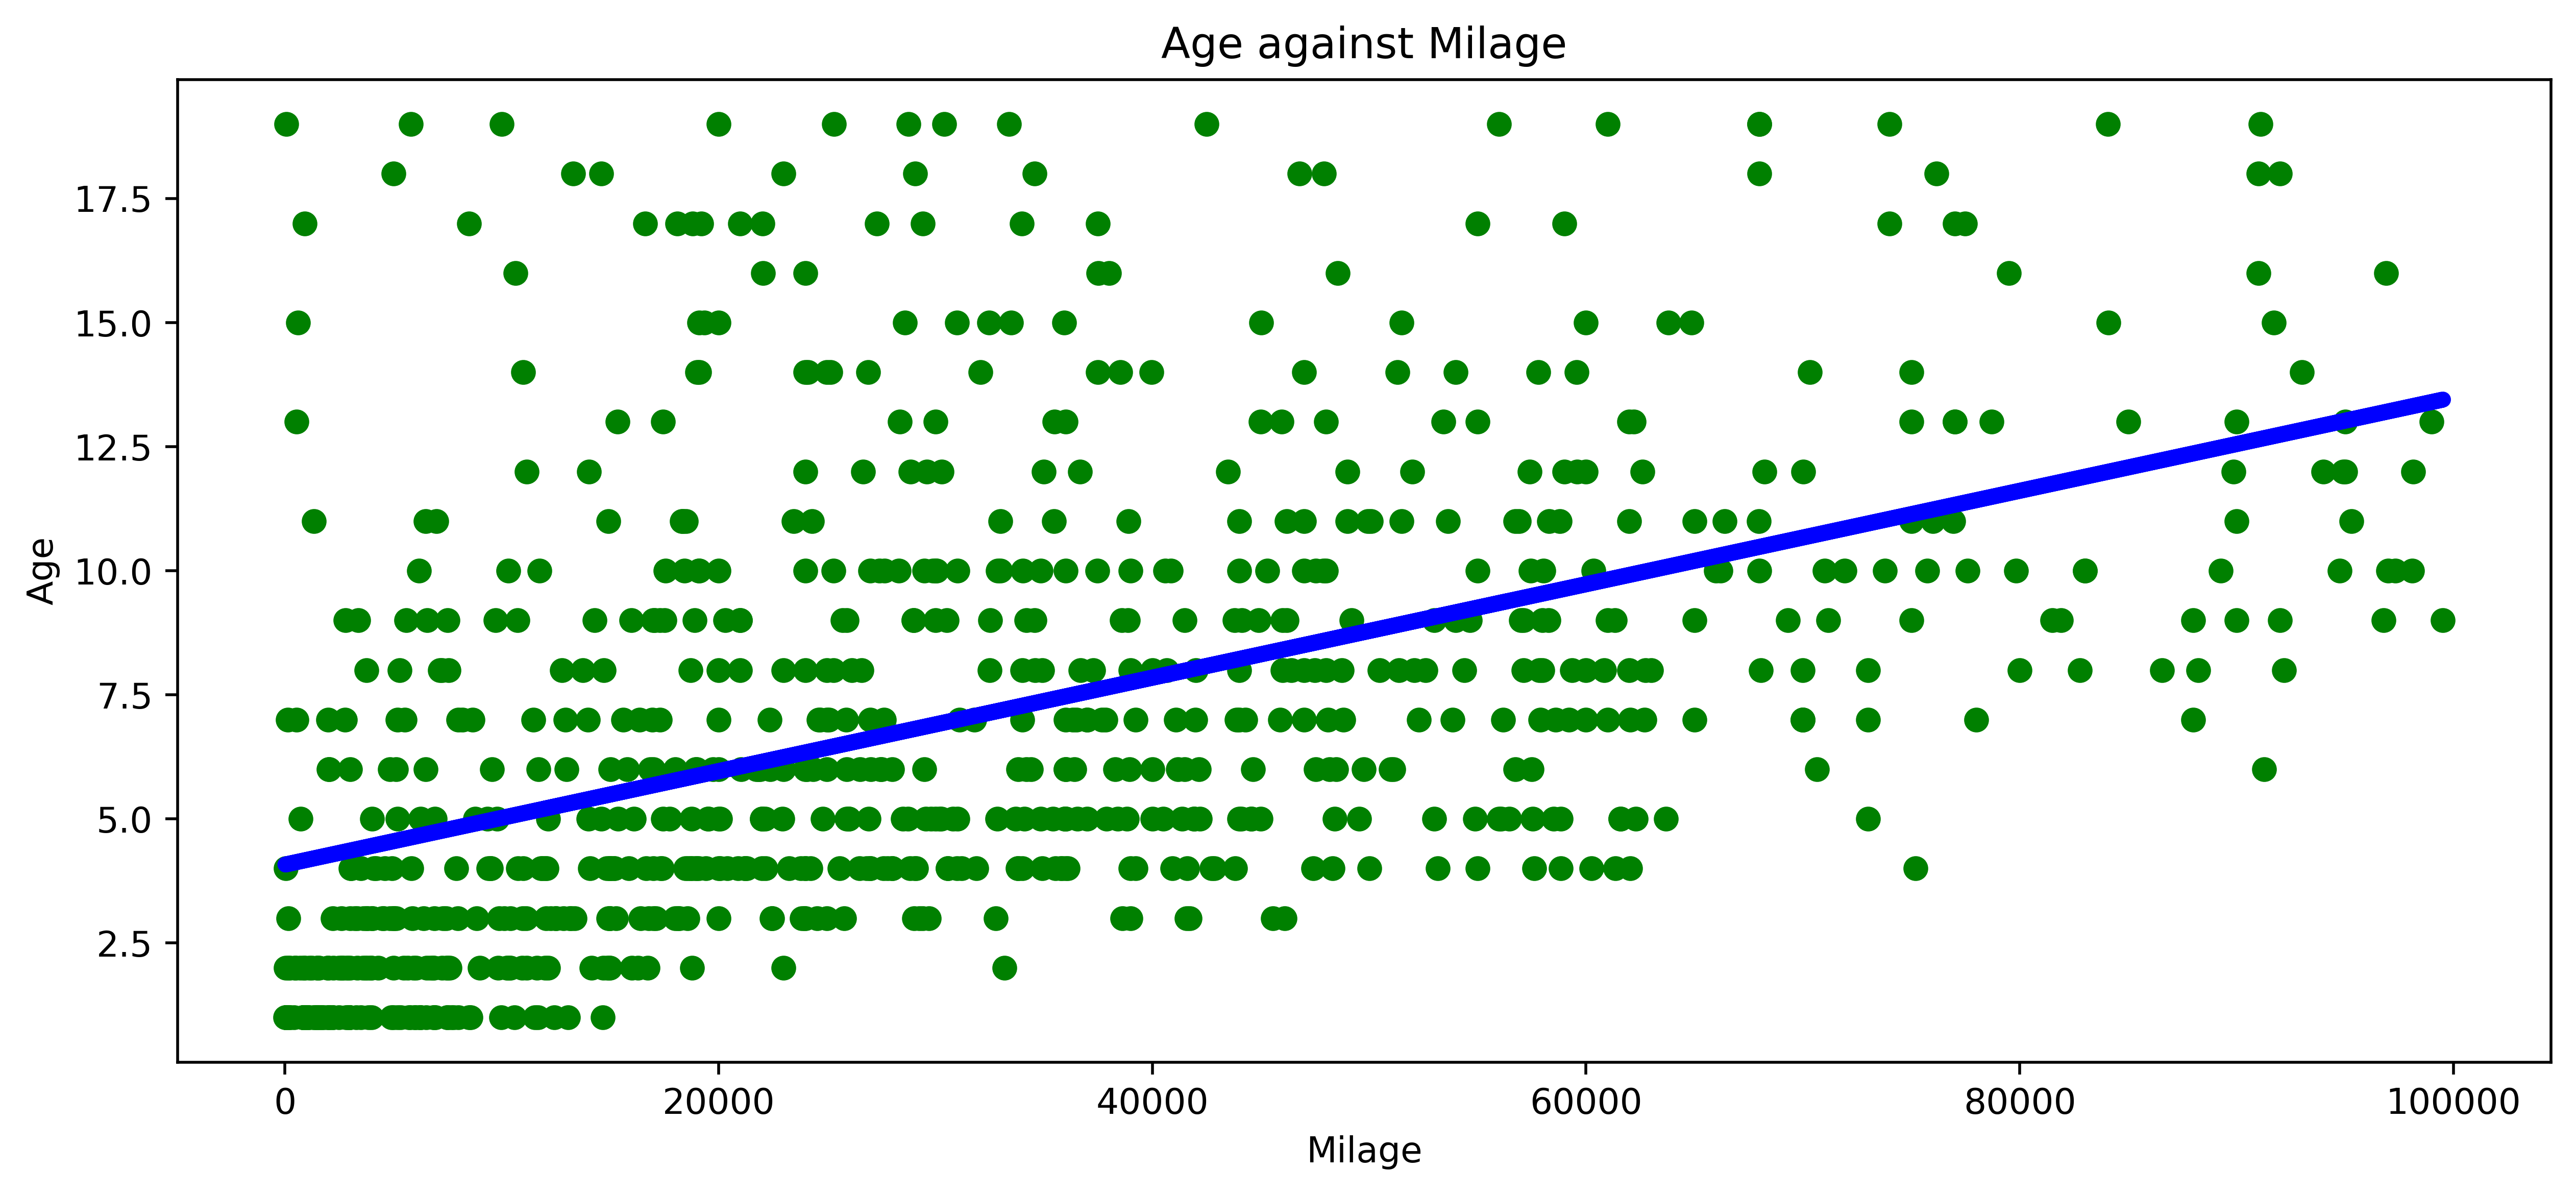

In [213]:
plt.figure(figsize = (12, 5), dpi = 500)
plt.scatter(df_2.milage, df_2.age, color = "green")
plt.plot(df_2.milage, LR.predict(x), color = "blue", lw =4.5)
plt.xlabel("Milage")
plt.ylabel("Age")
plt.title("Age against Milage")
plt.show()

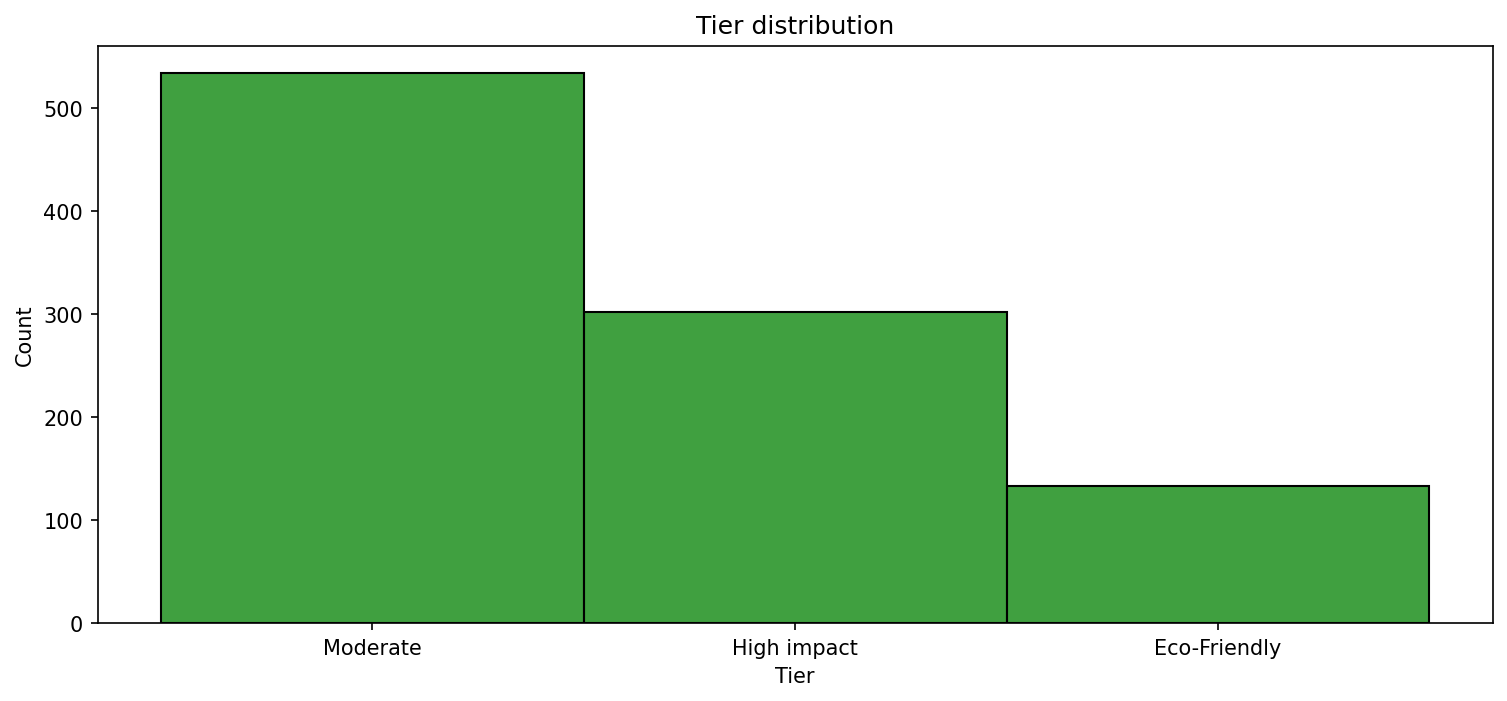

In [232]:
plt.figure(figsize = (12, 5), dpi = 150)
sns.histplot(x = "Tier", data = df, color = "g")
plt.title("Tier distribution")
plt.show()